**Aim-** Use TensorFlow to build our first Sequential model.


In [4]:
import numpy as np
import pandas as pd


## Generate Dataset



In [5]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
X, y = datasets.make_regression(n_samples=100, n_features=10, noise=5, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

df= pd.DataFrame(X)
df['Output'] = y
df_train = pd.DataFrame(X_train)
df_train['Output'] = y_train
df_train_features = df_train.copy()
df_train_labels = df_train_features.pop('Output')

df_test = pd.DataFrame(X_test)
df_test['Output'] = y_test
df_test_features = df_test.copy()
df_test_labels = df_test_features.pop('Output')




## Visualize Dataset
This is the same code from Assignment 1

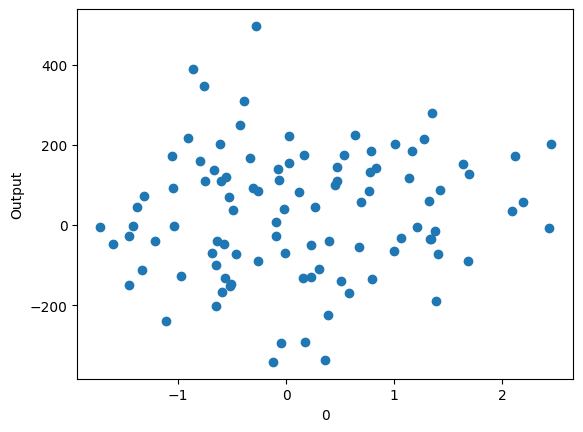

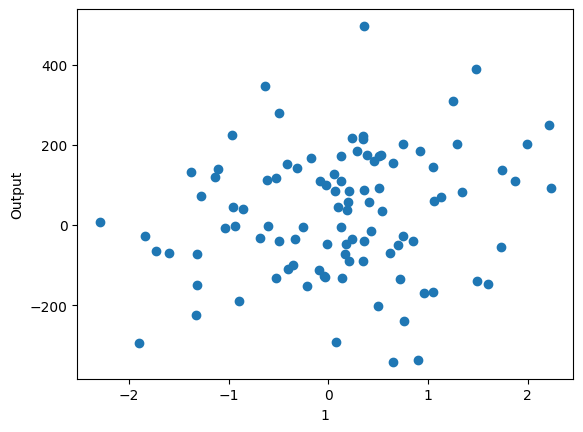

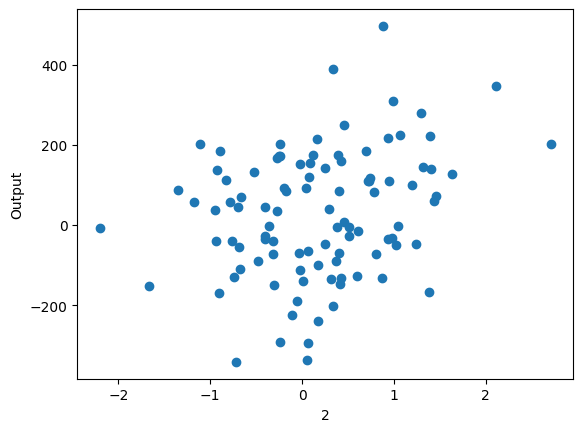

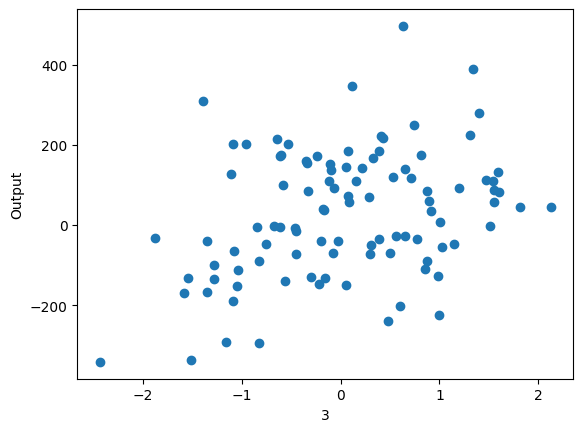

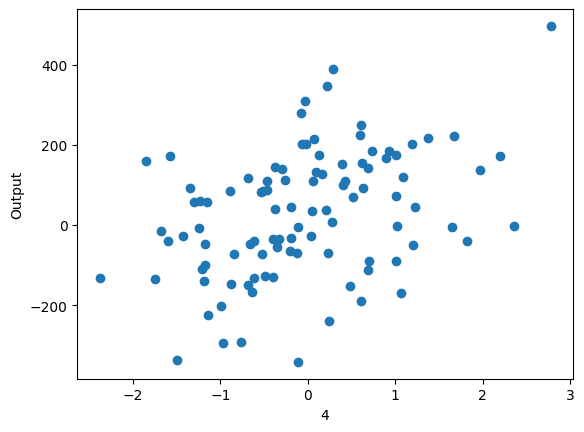

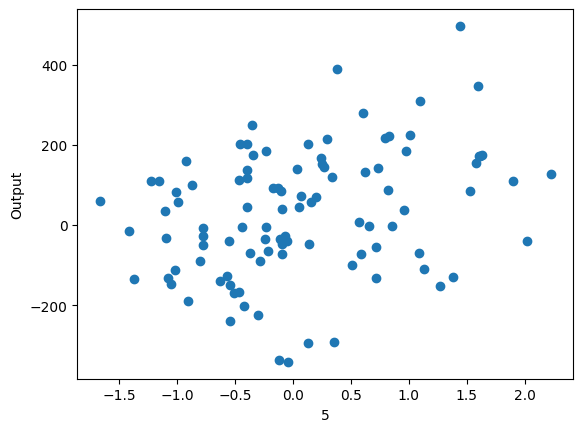

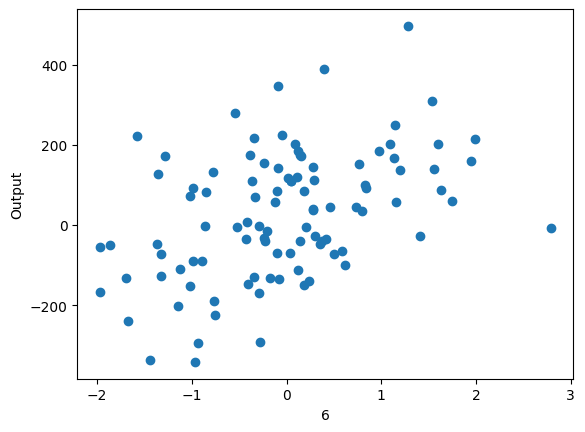

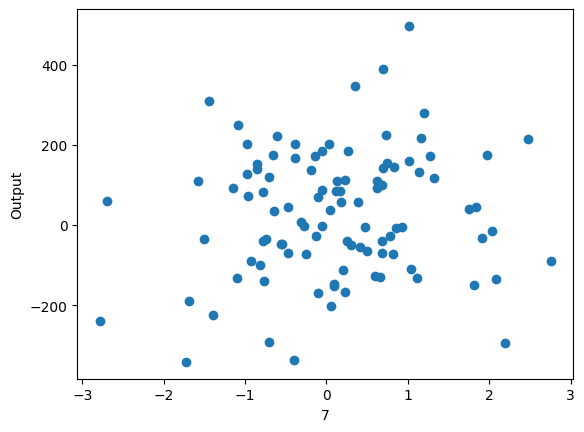

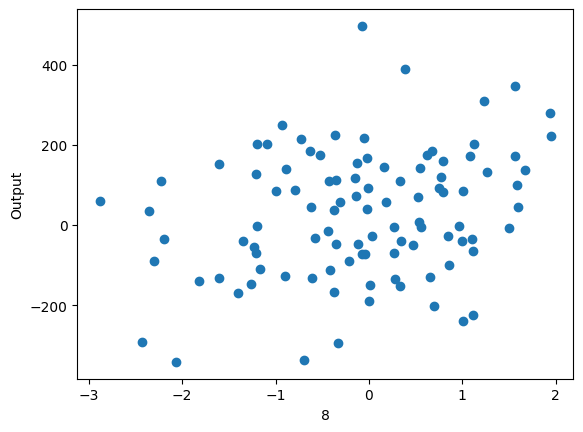

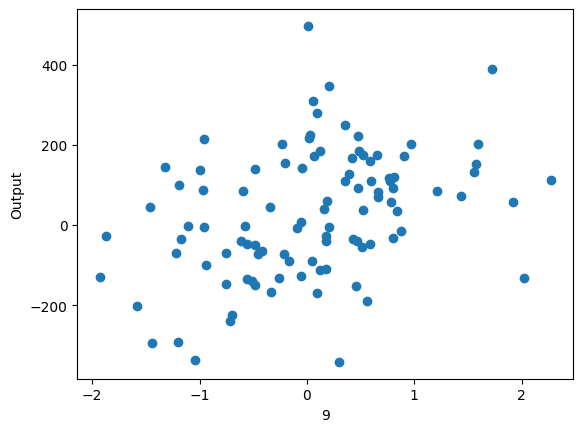

In [6]:
import matplotlib.pyplot as plt

for i in range(X.shape[1]):
  plt.xlabel(i)
  plt.ylabel('Output')
  plt.scatter(df[i], df['Output'])
  plt.show()

# Your code here


[Note: Use this Link for help](https://www.tensorflow.org/tutorials/keras/regression)

## Model Definition

Using TensorFlow, build a model with the following definition:
> Input of shape 10 \\
> Dense of shape 50 \\
> Dense of shape 10 \\
Dense of shape 5 \\
> Dense of shape 1 \\

Use Mean Square Error Loss and Stochaistic Gradient Descent (SGD) Optimizer

Use Gradient Decay with appropriate parameters

In [7]:
import tensorflow as tf
from tensorflow import keras

# normalization layer
norm = keras.layers.Normalization(axis=-1, mean=0, variance=1)

# optimizer
opt = keras.optimizers.SGD(learning_rate=0.01)

# model
model = keras.Sequential([
    norm,
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1)
])

model.build(input_shape=(None, 10))
model.compile(loss=keras.losses.MeanSquaredError(), optimizer=opt)
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │           550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [Output]')
  plt.legend()
  plt.grid(True)


In [9]:
%%time
history_dnn = model.fit(
    df_train_features,
    df_train_labels,
    validation_split=0.2,
    verbose=0, epochs=500)

CPU times: user 1min 1s, sys: 2.07 s, total: 1min 3s
Wall time: 1min 21s


In [10]:
history_dnn.history['val_loss']

[21425.708984375,
 5.240355091684676e+24,
 3.4917452886854494e+20,
 3.220674330801461e+20,
 2.970647497707524e+20,
 2.7400306512419724e+20,
 2.527317020670102e+20,
 2.3311166473725438e+20,
 2.1501477646741012e+20,
 1.9832280017507294e+20,
 1.8292662912239534e+20,
 1.687256887817614e+20,
 1.556271979639729e+20,
 1.4354555309173768e+20,
 1.3240184441455352e+20,
 1.2212324028219654e+20,
 1.1264257372834916e+20,
 1.0389792905422805e+20,
 9.583213165518887e+19,
 8.839251052621464e+19,
 8.153042327289253e+19,
 7.520106259736743e+19,
 6.936307806634194e+19,
 6.397829463609967e+19,
 5.901154552673783e+19,
 5.443036435891146e+19,
 5.020484441634505e+19,
 4.6307348374762815e+19,
 4.271242913705152e+19,
 3.939658354265581e+19,
 3.6338151212508512e+19,
 3.3517156219356185e+19,
 3.091516195222428e+19,
 2.851516116525436e+19,
 2.630147922068085e+19,
 2.425964654548222e+19,
 2.2376323864590287e+19,
 2.0639209841913496e+19,
 1.9036953119406686e+19,
 1.7559076450768781e+19,
 1.6195933820489302e+19,
 1.

## Plot Loss

Using matplotlib visualise how the loss (both validation and training) is changing, use this information to retrain the model with appropriate parameters.<br>We ideally want the loss to be constant over the last few iterations.

,Mean Square error
dnn_model,35174.503906


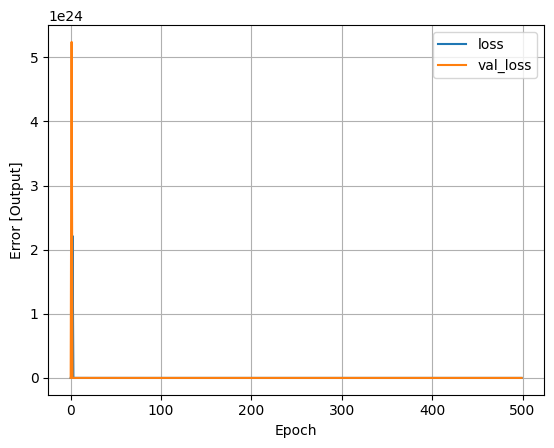

In [11]:
# Your code here
plot_loss(history_dnn)

test_results={}
test_results['dnn_model'] = model.evaluate(df_test_features, df_test_labels, verbose=0)
pd.DataFrame(test_results, index=['Mean Square error']).T


## Evaluation Metrics
Use the R2 Score function implemented in the first assignment to evaluate the performance of the model.

In [12]:
# Insert the function for R2 Score
def r2_score(y_true, y_pred):
    ssr= np.sum((np.subtract(y_true, y_pred))**2)
    mean = np.mean(y_true)
    sst = np.sum((np.subtract(mean, y_pred))**2)
    denom = ssr/sst
    r_score = 1-denom
    return r_score

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


Text(0, 0.5, 'Predictions')

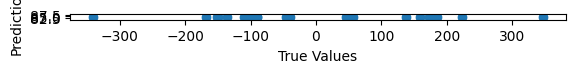

In [13]:
# predicting the results
pred = model.predict(df_test_features).flatten()
a = plt.axes(aspect='equal')
plt.scatter(df_test_labels, pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [14]:
# checking accuracy of model
accuracy = r2_score(y_test, pred)
print(accuracy)

res = pd.DataFrame({'Expected': df_test_labels, 'Predicted': pred})
res


-3.2054650814378896


,Expected,Predicted
0,222.841343,84.66021
1,-167.552578,84.66021
2,173.478511,84.66021
3,-46.300805,84.66021
4,347.883140,84.66021
5,-39.573033,84.66021
6,-90.567807,84.66021
7,-110.252556,84.66021
8,45.237675,84.66021
9,159.059644,84.66021
